#Pandas
{{ bedge }}

Importing the library, loading the data and reading the data

In [ ]:
import pandas as pd

In [ ]:
! wget https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip
! unzip /content/stack-overflow-developer-survey-2022.zip
! rm /content/stack-overflow-developer-survey-2022.zip

--2022-10-30 14:16:49--  https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip
Resolving info.stackoverflowsolutions.com (info.stackoverflowsolutions.com)... 104.17.72.206, 104.17.70.206, 104.17.71.206, ...
Connecting to info.stackoverflowsolutions.com (info.stackoverflowsolutions.com)|104.17.72.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12089826 (12M) [application/zip]
Saving to: ‘stack-overflow-developer-survey-2022.zip’

stack-overflow-deve 100%[===================>]  11.53M   973KB/s    in 12s     

2022-10-30 14:17:02 (965 KB/s) - ‘stack-overflow-developer-survey-2022.zip’ saved [12089826/12089826]

Archive:  /content/stack-overflow-developer-survey-2022.zip
replace README_2022.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace README_2022.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: README_2022.txt         
  inflating: so_survey_2022.pdf      
  inflati

In [ ]:
df = pd.read_csv("/content/survey_results_public.csv")
schema = pd.read_csv("/content/survey_results_schema.csv",index_col ='qname')

In [ ]:
pd.set_option("display.max_columns",85)

In [ ]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

# Splitting Data

## Drop
The data we loaded has some columns that we don't need, will use " drop " to remove these columns

In [ ]:
schema

qid                                           question  \
qname                                                                    
S0            QID16  <div><span style="font-size:19px;"><strong>Hel...   
MetaInfo      QID12                                  Browser Meta Info   
S1             QID1  <span style="font-size:22px; font-family: aria...   
MainBranch     QID2  Which of the following options best describes ...   
Employment   QID296  Which of the following best describes your cur...   
...             ...                                                ...   
Frequency_2  QID290  Interacting with people outside of your immedi...   
Frequency_3  QID290  Encountering knowledge silos (where one indivi...   
TrueFalse_1  QID294  Are you involved in supporting new hires durin...   
TrueFalse_2  QID294  Do you use learning resources provided by your...   
TrueFalse_3  QID294  Does your employer give you time to learn new ...   

            force_resp  type selector  
qname                                  
S0               False    DB       TB  
MetaInfo         False  Meta  Browser  
S1               False    DB       TB  
MainBranch        True    MC     SAVR  
Employment       False    MC     MAVR  
...                ...   ...      ...  
Frequency_2        NaN    MC     MAVR  
Frequency_3        NaN    MC     MAVR  
TrueFalse_1        NaN    MC     MAVR  
TrueFalse_2        NaN    MC     MAVR  
TrueFalse_3        NaN    MC     MAVR  

[79 rows x 5 columns]

In [ ]:
meaning = schema.drop(['S0'],axis=0)

In [ ]:
meaning

qid                                           question  \
qname                                                                    
MetaInfo      QID12                                  Browser Meta Info   
S1             QID1  <span style="font-size:22px; font-family: aria...   
MainBranch     QID2  Which of the following options best describes ...   
Employment   QID296  Which of the following best describes your cur...   
RemoteWork   QID308  Which best describes your current work situation?   
...             ...                                                ...   
Frequency_2  QID290  Interacting with people outside of your immedi...   
Frequency_3  QID290  Encountering knowledge silos (where one indivi...   
TrueFalse_1  QID294  Are you involved in supporting new hires durin...   
TrueFalse_2  QID294  Do you use learning resources provided by your...   
TrueFalse_3  QID294  Does your employer give you time to learn new ...   

            force_resp  type selector  
qname                                  
MetaInfo         False  Meta  Browser  
S1               False    DB       TB  
MainBranch        True    MC     SAVR  
Employment       False    MC     MAVR  
RemoteWork       False    MC     SAVR  
...                ...   ...      ...  
Frequency_2        NaN    MC     MAVR  
Frequency_3        NaN    MC     MAVR  
TrueFalse_1        NaN    MC     MAVR  
TrueFalse_2        NaN    MC     MAVR  
TrueFalse_3        NaN    MC     MAVR  

[78 rows x 5 columns]

In [ ]:
# to drop columns 
meaning = schema.drop(["qid" ,'force_resp' , 'type' , 'selector'],axis=1)
meaning.drop(['S0','S1'],axis=0, inplace = True)

In [ ]:
meaning

question
qname                                                              
MetaInfo                                          Browser Meta Info
MainBranch        Which of the following options best describes ...
Employment        Which of the following best describes your cur...
RemoteWork        Which best describes your current work situation?
CodingActivities  Which of the following best describes the code...
...                                                             ...
Frequency_2       Interacting with people outside of your immedi...
Frequency_3       Encountering knowledge silos (where one indivi...
TrueFalse_1       Are you involved in supporting new hires durin...
TrueFalse_2       Do you use learning resources provided by your...
TrueFalse_3       Does your employer give you time to learn new ...

[77 rows x 1 columns]

In [ ]:
schema['question'] 

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

In [ ]:
meaning.drop('S2',inplace=True)
meaning

question
qname                                                              
MetaInfo                                          Browser Meta Info
MainBranch        Which of the following options best describes ...
Employment        Which of the following best describes your cur...
RemoteWork        Which best describes your current work situation?
CodingActivities  Which of the following best describes the code...
...                                                             ...
Frequency_2       Interacting with people outside of your immedi...
Frequency_3       Encountering knowledge silos (where one indivi...
TrueFalse_1       Are you involved in supporting new hires durin...
TrueFalse_2       Do you use learning resources provided by your...
TrueFalse_3       Does your employer give you time to learn new ...

[76 rows x 1 columns]

In [ ]:
meaning.drop(['S1','MetaInfo'],inplace=True)
meaning

question
qname                                                              
MainBranch        Which of the following options best describes ...
Employment        Which of the following best describes your cur...
RemoteWork        Which best describes your current work situation?
CodingActivities  Which of the following best describes the code...
S2                <span style="font-size:22px; font-family: aria...
...                                                             ...
Frequency_2       Interacting with people outside of your immedi...
Frequency_3       Encountering knowledge silos (where one indivi...
TrueFalse_1       Are you involved in supporting new hires durin...
TrueFalse_2       Do you use learning resources provided by your...
TrueFalse_3       Does your employer give you time to learn new ...

[76 rows x 1 columns]

## Split


In [ ]:
# selceting columns we need and making a subsite of the original data
new_df = df[['LearnCode','EdLevel','YearsCodePro','Age','LanguageHaveWorkedWith','CompTotal','Currency','CompFreq']]

In [ ]:
new_df.head()

LearnCode  \
0                                                NaN   
1                                                NaN   
2  Books / Physical media;Friend or family member...   
3  Books / Physical media;School (i.e., Universit...   
4  Other online resources (e.g., videos, blogs, f...   

                                           EdLevel YearsCodePro  \
0                                              NaN          NaN   
1                                              NaN          NaN   
2  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            5   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           17   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            3   

               Age                       LanguageHaveWorkedWith  CompTotal  \
0              NaN                                          NaN        NaN   
1              NaN                        JavaScript;TypeScript        NaN   
2  25-34 years old            C#;C++;HTML/CSS;JavaScript;Python    32000.0   
3  35-44 years old                 C#;JavaScript;SQL;TypeScript    60000.0   
4  25-34 years old  C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript        NaN   

                    Currency CompFreq  
0                        NaN      NaN  
1       CAD\tCanadian dollar      NaN  
2        GBP\tPound sterling   Yearly  
3    ILS\tIsraeli new shekel  Monthly  
4  USD\tUnited States dollar      NaN

In [ ]:
new_df['Currency'].value_counts()

EUR European Euro              12634
USD\tUnited States dollar      12346
INR\tIndian rupee               4229
GBP\tPound sterling             3318
CAD\tCanadian dollar            1847
                               ...  
BND\tBrunei dollar                 1
PGK\tPapua New Guinean kina        1
SHP\tSaint Helena pound            1
GIP\tGibraltar pound               1
TOP\tTongan pa’anga                1
Name: Currency, Length: 142, dtype: int64

In [ ]:
lis = ['EUR European Euro' , 'USD\tUnited States dollar','INR\tIndian rupee','GBP\tPound sterling','CAD\tCanadian dollar']

filt = new_df['Currency'].isin(lis)
sal = new_df.loc[filt]

In [ ]:
# notice that the index of the rows hasn't been reset
sal

In [ ]:
smaller_sal = sal.iloc[:15000]

In [ ]:
smaller_sal

In [ ]:
# when used loc is used we will get a smaller data set because some numbers in the index are missing
sal.loc[:15000]

LearnCode  \
1                                                    NaN   
2      Books / Physical media;Friend or family member...   
4      Other online resources (e.g., videos, blogs, f...   
8                    On the job training;Coding Bootcamp   
10     Books / Physical media;Friend or family member...   
...                                                  ...   
14989  Other online resources (e.g., videos, blogs, f...   
14990  Friend or family member;Other online resources...   
14993  Books / Physical media;Friend or family member...   
14995            School (i.e., University, College, etc)   
15000  Books / Physical media;School (i.e., Universit...   

                                               EdLevel      YearsCodePro  \
1                                                  NaN               NaN   
2      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                 5   
4         Bachelor’s degree (B.A., B.S., B.Eng., etc.)                 3   
8      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                 6   
10        Bachelor’s degree (B.A., B.S., B.Eng., etc.)                 2   
...                                                ...               ...   
14989              Associate degree (A.A., A.S., etc.)                 6   
14990                        Primary/elementary school  Less than 1 year   
14993  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                22   
14995     Bachelor’s degree (B.A., B.S., B.Eng., etc.)                 9   
15000     Bachelor’s degree (B.A., B.S., B.Eng., etc.)                20   

                   Age                             LanguageHaveWorkedWith  \
1                  NaN                              JavaScript;TypeScript   
2      25-34 years old                  C#;C++;HTML/CSS;JavaScript;Python   
4      25-34 years old        C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript   
8      25-34 years old                                                NaN   
10     18-24 years old   Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL   
...                ...                                                ...   
14989  25-34 years old                         C#;HTML/CSS;JavaScript;SQL   
14990  18-24 years old  Dart;Elixir;HTML/CSS;JavaScript;PHP;Python;SQL...   
14993  35-44 years old                                    Java;Python;SQL   
14995  35-44 years old                                           C;C#;C++   
15000  35-44 years old         Bash/Shell;Go;Haskell;Scala;SQL;TypeScript   

       CompTotal                   Currency CompFreq  
1            NaN       CAD\tCanadian dollar      NaN  
2        32000.0        GBP\tPound sterling   Yearly  
4            NaN  USD\tUnited States dollar      NaN  
8        46000.0          EUR European Euro   Yearly  
10       48000.0        GBP\tPound sterling   Yearly  
...          ...                        ...      ...  
14989    54000.0  USD\tUnited States dollar   Yearly  
14990    28000.0          EUR European Euro   Yearly  
14993   120000.0          EUR European Euro   Yearly  
14995        NaN  USD\tUnited States dollar      NaN  
15000    50000.0  USD\tUnited States dollar   Yearly  

[7665 rows x 8 columns]

In [ ]:
euro_filt = sal['Currency'] =='EUR European Euro'
euro = sal.loc[euro_filt]

In [ ]:
euro.head()

LearnCode  \
8                 On the job training;Coding Bootcamp   
17  Other online resources (e.g., videos, blogs, f...   
18  Books / Physical media;School (i.e., Universit...   
21                            Other (please specify):   
23  Other online resources (e.g., videos, blogs, f...   

                                              EdLevel YearsCodePro  \
8     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            6   
17    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)           10   
18  Secondary school (e.g. American high school, G...           22   
21    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            4   
23    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            6   

                Age LanguageHaveWorkedWith  CompTotal           Currency  \
8   25-34 years old                    NaN    46000.0  EUR European Euro   
17  25-34 years old             Python;SQL   190000.0  EUR European Euro   
18  45-54 years old      C#;PowerShell;SQL     4000.0  EUR European Euro   
21  25-34 years old  Python;SQL;TypeScript    32000.0  EUR European Euro   
23  25-34 years old                    VBA        NaN  EUR European Euro   

   CompFreq  
8    Yearly  
17   Yearly  
18  Monthly  
21   Yearly  
23      NaN

In [ ]:
usa_filt = sal['Currency'] =='USD\tUnited States dollar'
usa = sal.loc[usa_filt]

In [ ]:
usa.head()

LearnCode  \
4   Other online resources (e.g., videos, blogs, f...   
11  Other online resources (e.g., videos, blogs, f...   
12            School (i.e., University, College, etc)   
14  Other online resources (e.g., videos, blogs, f...   
26  Books / Physical media;Other online resources ...   

                                            EdLevel YearsCodePro  \
4      Bachelor’s degree (B.A., B.S., B.Eng., etc.)            3   
11     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           10   
12     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            5   
14  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            5   
26     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            5   

                Age                             LanguageHaveWorkedWith  \
4   25-34 years old        C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript   
11  35-44 years old  C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL   
12  25-34 years old               C;HTML/CSS;Rust;SQL;Swift;TypeScript   
14  25-34 years old        HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala   
26  25-34 years old     Bash/Shell;Groovy;HTML/CSS;Java;JavaScript;SQL   

    CompTotal                   Currency CompFreq  
4         NaN  USD\tUnited States dollar      NaN  
11   194400.0  USD\tUnited States dollar   Yearly  
12    65000.0  USD\tUnited States dollar   Yearly  
14   110000.0  USD\tUnited States dollar   Yearly  
26   106960.0  USD\tUnited States dollar   Yearly

## Combine

In [ ]:
# index has been reset to the defualt
len(euro)

12634

In [ ]:
# adding a column
# the column most have the same number of rows as the dataframe that it is meant to be add to
example_column = range(12634)

# Using 'id' as the column name
euro['id'] = example_column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
euro

LearnCode  \
8                    On the job training;Coding Bootcamp   
17     Other online resources (e.g., videos, blogs, f...   
18     Books / Physical media;School (i.e., Universit...   
21                               Other (please specify):   
23     Other online resources (e.g., videos, blogs, f...   
...                                                  ...   
73202  Books / Physical media;Other online resources ...   
73211  Books / Physical media;Friend or family member...   
73221                                On the job training   
73251  Other online resources (e.g., videos, blogs, f...   
73261  Books / Physical media;Other online resources ...   

                                                 EdLevel YearsCodePro  \
8        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            6   
17       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)           10   
18     Secondary school (e.g. American high school, G...           22   
21       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            4   
23       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            6   
...                                                  ...          ...   
73202  Some college/university study without earning ...           18   
73211       Bachelor’s degree (B.A., B.S., B.Eng., etc.)            1   
73221       Bachelor’s degree (B.A., B.S., B.Eng., etc.)           21   
73251    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            8   
73261    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            2   

                   Age                             LanguageHaveWorkedWith  \
8      25-34 years old                                                NaN   
17     25-34 years old                                         Python;SQL   
18     45-54 years old                                  C#;PowerShell;SQL   
21     25-34 years old                              Python;SQL;TypeScript   
23     25-34 years old                                                VBA   
...                ...                                                ...   
73202  45-54 years old                                           Java;SQL   
73211  25-34 years old                                   HTML/CSS;PHP;SQL   
73221  35-44 years old             HTML/CSS;JavaScript;Lua;PHP;Python;SQL   
73251  25-34 years old  Java;JavaScript;Python;Ruby;Scala;Swift;TypeSc...   
73261  18-24 years old  Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL...   

       CompTotal           Currency CompFreq  
8        46000.0  EUR European Euro   Yearly  
17      190000.0  EUR European Euro   Yearly  
18        4000.0  EUR European Euro  Monthly  
21       32000.0  EUR European Euro   Yearly  
23           NaN  EUR European Euro      NaN  
...          ...                ...      ...  
73202    55000.0  EUR European Euro  Monthly  
73211    24000.0  EUR European Euro   Yearly  
73221    60000.0  EUR European Euro   Yearly  
73251    65000.0  EUR European Euro   Yearly  
73261    36000.0  EUR European Euro   Yearly  

[12634 rows x 8 columns]

In [ ]:
euro.reset_index(drop=True,inplace =True)

In [ ]:
euro.loc[len(euro)] 

In [ ]:
# adding a row
euro.loc[len(euro)-1]

LearnCode                 test
EdLevel                   test
YearsCodePro              test
Age                       test
LanguageHaveWorkedWith    test
CompTotal                 test
Currency                  test
CompFreq                  test
Name: 12634, dtype: object

In [ ]:
# note that iloc cann't be used to add new rows
euro.loc[len(euro)] = ['test','test','test','test','test','test','test','test']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
euro.tail()

LearnCode  \
12630  Books / Physical media;Friend or family member...   
12631                                On the job training   
12632  Other online resources (e.g., videos, blogs, f...   
12633  Books / Physical media;Other online resources ...   
12634                                               test   

                                               EdLevel YearsCodePro  \
12630     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            1   
12631     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           21   
12632  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            8   
12633  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            2   
12634                                             test         test   

                   Age                             LanguageHaveWorkedWith  \
12630  25-34 years old                                   HTML/CSS;PHP;SQL   
12631  35-44 years old             HTML/CSS;JavaScript;Lua;PHP;Python;SQL   
12632  25-34 years old  Java;JavaScript;Python;Ruby;Scala;Swift;TypeSc...   
12633  18-24 years old  Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL...   
12634             test                                               test   

      CompTotal           Currency CompFreq     id  
12630   24000.0  EUR European Euro   Yearly  12630  
12631   60000.0  EUR European Euro   Yearly  12631  
12632   65000.0  EUR European Euro   Yearly  12632  
12633   36000.0  EUR European Euro   Yearly  12633  
12634      test               test     test   test

In [ ]:
# Inserting a row at a specific index
# if the index of the row is set to an already existing row it will overwrite it
# so we will add a row in a index before the index we want our row to be

euro.loc[1.5] = ['test','test','test','test','test','test','test','test']

# and by resetting the index it will have index we want
euro = euro.sort_index().reset_index(drop=True)

euro.head()

LearnCode  \
0                On the job training;Coding Bootcamp   
1  Other online resources (e.g., videos, blogs, f...   
2                                               test   
3  Books / Physical media;School (i.e., Universit...   
4                            Other (please specify):   

                                             EdLevel YearsCodePro  \
0    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            6   
1    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)           10   
2                                               test         test   
3  Secondary school (e.g. American high school, G...           22   
4    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            4   

               Age LanguageHaveWorkedWith CompTotal           Currency  \
0  25-34 years old                    NaN   46000.0  EUR European Euro   
1  25-34 years old             Python;SQL  190000.0  EUR European Euro   
2             test                   test      test               test   
3  45-54 years old      C#;PowerShell;SQL    4000.0  EUR European Euro   
4  25-34 years old  Python;SQL;TypeScript   32000.0  EUR European Euro   

  CompFreq  
0   Yearly  
1   Yearly  
2     test  
3  Monthly  
4   Yearly

In [ ]:
# combine the two dataframe
usa_euro = pd.concat([usa, euro], ignore_index=True)

In [ ]:
usa_euro

# Handling Missing Values With Pandas
there are several ways to handel missing data 

-drop the rows of missing data

-replace the missing data with average of the column if numeric

-replace the missing data with most common value if not numeric 


In [ ]:
# drop rows with nan values in a certain column
sal = sal[sal['CompTotal'].notna()]

In [ ]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26461 entries, 2 to 73266
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LearnCode               26450 non-null  object 
 1   EdLevel                 26448 non-null  object 
 2   YearsCodePro            26365 non-null  object 
 3   Age                     26392 non-null  object 
 4   LanguageHaveWorkedWith  26389 non-null  object 
 5   CompTotal               26461 non-null  float64
 6   Currency                26461 non-null  object 
 7   CompFreq                26410 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.8+ MB


In [ ]:
# check to see what is the most common answer in the column
sal['LearnCode'].value_counts()

In [ ]:
df['LearnCode'].value_counts().index[0]

In [ ]:
# replace nan with that value
sal['LearnCode'] =sal['LearnCode'].fillna((df['LearnCode'].value_counts().index[0]))

In [ ]:
df['CompTotal'] = df['CompTotal'].fillna(df['CompTotal'].mean())

In [ ]:
# Backward fill or Forward fill can be used to inpute the previous or next values
# Backward fill
df['Age'] = df['Age'].fillna(method='bfill')
# Forward fill
df['Age'] = df['Age'].fillna(method='ffill')

In [ ]:
# Set the limit
limit = len(sal) * 0.7
# Drop columns using that limit
new=sal.dropna(axis=1, thresh=limit)
# View columns in the dataset
new.columns

In [ ]:
new

LearnCode  \
2      Books / Physical media;Friend or family member...   
8                    On the job training;Coding Bootcamp   
10     Books / Physical media;Friend or family member...   
11     Other online resources (e.g., videos, blogs, f...   
12               School (i.e., University, College, etc)   
...                                                  ...   
73258  Other online resources (e.g., videos, blogs, f...   
73261  Books / Physical media;Other online resources ...   
73263  Books / Physical media;Other online resources ...   
73264  Other online resources (e.g., videos, blogs, f...   
73266         Books / Physical media;On the job training   

                                               EdLevel YearsCodePro  \
2      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            5   
8      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            6   
10        Bachelor’s degree (B.A., B.S., B.Eng., etc.)            2   
11        Bachelor’s degree (B.A., B.S., B.Eng., etc.)           10   
12        Bachelor’s degree (B.A., B.S., B.Eng., etc.)            5   
...                                                ...          ...   
73258     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            1   
73261  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            2   
73263     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            5   
73264  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            5   
73266     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           31   

                   Age                             LanguageHaveWorkedWith  \
2      25-34 years old                  C#;C++;HTML/CSS;JavaScript;Python   
8      25-34 years old                                                NaN   
10     18-24 years old   Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL   
11     35-44 years old  C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL   
12     25-34 years old               C;HTML/CSS;Rust;SQL;Swift;TypeScript   
...                ...                                                ...   
73258  18-24 years old                                        Go;Java;SQL   
73261  18-24 years old  Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL...   
73263  25-34 years old  Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...   
73264  25-34 years old          Bash/Shell;HTML/CSS;JavaScript;Python;SQL   
73266  55-64 years old                                      C#;Delphi;VBA   

       CompTotal                   Currency CompFreq  
2        32000.0        GBP\tPound sterling   Yearly  
8        46000.0          EUR European Euro   Yearly  
10       48000.0        GBP\tPound sterling   Yearly  
11      194400.0  USD\tUnited States dollar   Yearly  
12       65000.0  USD\tUnited States dollar   Yearly  
...          ...                        ...      ...  
73258  3200000.0          INR\tIndian rupee   Yearly  
73261    36000.0          EUR European Euro   Yearly  
73263    60000.0  USD\tUnited States dollar   Yearly  
73264   107000.0  USD\tUnited States dollar   Yearly  
73266    58500.0        GBP\tPound sterling   Yearly  

[26461 rows x 8 columns]

In [ ]:
# drops all the rows any nan values in the datafame
sal.dropna(axis = 0, how ='any' , inplace =True )

NameError: ignored

# Changing the data
Rarely does data come ready for processing. You will need to preform different operations depending on the data.

In [ ]:
# changing the column name
# multiple columns can be changed at once

sal.rename(columns={'CompTotal': 'salary'}, inplace=True)

In [ ]:
sal.head(2)

In [ ]:
sal.loc[2]

In [ ]:
# change a row
sal.loc[2] = ['Books ', 'Bachelor’s degree', 'two' ,'18-24' , 'JavaScript','48000.0','GBP\tPound sterling','Yearly']

In [ ]:
# changing only two columns in a certain row
sal.loc[2, ['EdLevel', 'Age']] = ['Bachelor', 'early twenties']

In [ ]:
# this will raise an error
filt = (sal['LearnCode'] == 'Books / Physical media')
sal[filt]['LearnCode'] = 'books'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
(sal['LearnCode'] == 'books').value_counts()

False    26461
Name: LearnCode, dtype: int64

In [ ]:
# will not raise an error
filt = (sal['LearnCode'] == 'Books / Physical media')
sal.loc[filt, 'LearnCode'] = 'books'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
(sal['LearnCode'] == 'books').value_counts()

False    26029
True       432
Name: LearnCode, dtype: int64

In [ ]:
# lower case a column
sal['LearnCode'] = sal['LearnCode'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sal['LearnCode']

2        books / physical media;friend or family member...
8                      on the job training;coding bootcamp
10       books / physical media;friend or family member...
11       other online resources (e.g., videos, blogs, f...
12                 school (i.e., university, college, etc)
                               ...                        
73258    other online resources (e.g., videos, blogs, f...
73261    books / physical media;other online resources ...
73263    books / physical media;other online resources ...
73264    other online resources (e.g., videos, blogs, f...
73266           books / physical media;on the job training
Name: LearnCode, Length: 26461, dtype: object

In [ ]:
# example of a function
def split_tech(tech):
    return tech.split(';')


In [ ]:
# apply is used to apply any function on column
sal['LanguageHaveWorkedWith'].apply(split_tech)

2                  [C#, C++, HTML/CSS, JavaScript, Python]
10       [Bash/Shell, C#, HTML/CSS, JavaScript, PowerSh...
11       [C#, HTML/CSS, JavaScript, PowerShell, Python,...
12             [C, HTML/CSS, Rust, SQL, Swift, TypeScript]
14       [HTML/CSS, JavaScript, PHP, Python, R, Ruby, S...
                               ...                        
73258                                      [Go, Java, SQL]
73261    [Bash/Shell, HTML/CSS, Java, JavaScript, Pytho...
73263    [Bash/Shell, Dart, JavaScript, PHP, Python, SQ...
73264      [Bash/Shell, HTML/CSS, JavaScript, Python, SQL]
73266                                    [C#, Delphi, VBA]
Name: LanguageHaveWorkedWith, Length: 26167, dtype: object

In [ ]:
sal['LanguageHaveWorkedWith'].notnull().value_counts()

In [ ]:
sal['LanguageHaveWorkedWith'].apply(lambda x: x.split(';'))

In [ ]:
sal['LanguageHaveWorkedWith'].apply(len)

2        5
10       6
11       7
12       6
14       7
        ..
73258    3
73261    7
73263    7
73264    5
73266    3
Name: LanguageHaveWorkedWith, Length: 26161, dtype: int64

In [ ]:
# will be applied on the series 
# not on the values inside the series
sal.apply(len, axis='rows')

LearnCode                 26167
EdLevel                   26167
YearsCodePro              26167
Age                       26167
LanguageHaveWorkedWith    26167
CompTotal                 26167
Currency                  26167
CompFreq                  26167
dtype: int64

In [ ]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26167 entries, 2 to 73266
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LearnCode               26167 non-null  object 
 1   EdLevel                 26167 non-null  object 
 2   YearsCodePro            26167 non-null  object 
 3   Age                     26167 non-null  object 
 4   LanguageHaveWorkedWith  26167 non-null  object 
 5   CompTotal               26167 non-null  float64
 6   Currency                26167 non-null  object 
 7   CompFreq                26167 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.8+ MB


In [ ]:
# applymap will apply the function on every value in every column
sal_only_strings = sal.drop(['CompTotal'],axis=1)
sal_only_strings.applymap(len)

LearnCode  EdLevel  YearsCodePro  Age  LanguageHaveWorkedWith  \
2            138       47             1   15                      33   
10           138       44             1   15                      48   
11            51       44             2   15                      49   
12            39       44             1   15                      36   
14           111       47             1   15                      43   
...          ...      ...           ...  ...                     ...   
73258         83       44             1   15                      11   
73261        146       47             1   15                      57   
73263        126       44             1   15                      52   
73264        143       47             1   15                      41   
73266         42       44             2   15                      13   

       Currency  CompFreq  
2            18         6  
10           18         6  
11           24         6  
12           24         6  
14           24         6  
...         ...       ...  
73258        16         6  
73261        17         6  
73263        24         6  
73264        24         6  
73266        18         6  

[26167 rows x 7 columns]

In [ ]:
sal_only_strings.applymap(str.lower)

LearnCode  \
2      books / physical media;friend or family member...   
10     books / physical media;friend or family member...   
11     other online resources (e.g., videos, blogs, f...   
12               school (i.e., university, college, etc)   
14     other online resources (e.g., videos, blogs, f...   
...                                                  ...   
73258  other online resources (e.g., videos, blogs, f...   
73261  books / physical media;other online resources ...   
73263  books / physical media;other online resources ...   
73264  other online resources (e.g., videos, blogs, f...   
73266         books / physical media;on the job training   

                                               EdLevel YearsCodePro  \
2      master’s degree (m.a., m.s., m.eng., mba, etc.)            5   
10        bachelor’s degree (b.a., b.s., b.eng., etc.)            2   
11        bachelor’s degree (b.a., b.s., b.eng., etc.)           10   
12        bachelor’s degree (b.a., b.s., b.eng., etc.)            5   
14     master’s degree (m.a., m.s., m.eng., mba, etc.)            5   
...                                                ...          ...   
73258     bachelor’s degree (b.a., b.s., b.eng., etc.)            1   
73261  master’s degree (m.a., m.s., m.eng., mba, etc.)            2   
73263     bachelor’s degree (b.a., b.s., b.eng., etc.)            5   
73264  master’s degree (m.a., m.s., m.eng., mba, etc.)            5   
73266     bachelor’s degree (b.a., b.s., b.eng., etc.)           31   

                   Age                             LanguageHaveWorkedWith  \
2      25-34 years old                  c#;c++;html/css;javascript;python   
10     18-24 years old   bash/shell;c#;html/css;javascript;powershell;sql   
11     35-44 years old  c#;html/css;javascript;powershell;python;rust;sql   
12     25-34 years old               c;html/css;rust;sql;swift;typescript   
14     25-34 years old        html/css;javascript;php;python;r;ruby;scala   
...                ...                                                ...   
73258  18-24 years old                                        go;java;sql   
73261  18-24 years old  bash/shell;html/css;java;javascript;python;sql...   
73263  25-34 years old  bash/shell;dart;javascript;php;python;sql;type...   
73264  25-34 years old          bash/shell;html/css;javascript;python;sql   
73266  55-64 years old                                      c#;delphi;vba   

                        Currency CompFreq  
2            gbp\tpound sterling   yearly  
10           gbp\tpound sterling   yearly  
11     usd\tunited states dollar   yearly  
12     usd\tunited states dollar   yearly  
14     usd\tunited states dollar   yearly  
...                          ...      ...  
73258          inr\tindian rupee   yearly  
73261          eur european euro   yearly  
73263  usd\tunited states dollar   yearly  
73264  usd\tunited states dollar   yearly  
73266        gbp\tpound sterling   yearly  

[26167 rows x 7 columns]

In [ ]:
sal['Age'].value_counts()

25-34 years old       12500
35-44 years old        6925
18-24 years old        3152
45-54 years old        2431
55-64 years old         929
65 years or older       152
Prefer not to say        47
Under 18 years old       25
Name: Age, dtype: int64

In [ ]:
# values that is not mentioned is replaced with Nan
sal['Age'].map({'25-34 years old': 'late twenties early thirties ', '18-24 years old': 'early twenties'})

2        late twenties early thirties 
10                      early twenties
11                                 NaN
12       late twenties early thirties 
14       late twenties early thirties 
                     ...              
73258                   early twenties
73261                   early twenties
73263    late twenties early thirties 
73264    late twenties early thirties 
73266                              NaN
Name: Age, Length: 26161, dtype: object

In [ ]:
# values that is not mentioned will be left as it was
sal['Age'].replace({'25-34 years old': 'late twenties early thirties ', '18-24 years old': 'early twenties'})

2        late twenties early thirties 
10                      early twenties
11                     35-44 years old
12       late twenties early thirties 
14       late twenties early thirties 
                     ...              
73258                   early twenties
73261                   early twenties
73263    late twenties early thirties 
73264    late twenties early thirties 
73266                  55-64 years old
Name: Age, Length: 26161, dtype: object

# Handling duplicats
Return boolean Series denoting duplicate rows. True means it is duplicated and False means it is unique

In [ ]:
dataframe ={ "price":[12,23,42,94,94,12],
             "product code":['c1','c2','c3','c4','c4','c1'],
             "amount":[10,2,13,4,4,10] }

test = pd.DataFrame(dataframe)

In [ ]:
test.duplicated(keep = False)

# first : Mark duplicates as True except for the first occurrence.
# last : Mark duplicates as True except for the last occurrence.
# False : Mark all duplicates as True.

0     True
1    False
2    False
3     True
4     True
5     True
dtype: bool

In [ ]:
! wget https://media.geeksforgeeks.org/wp-content/uploads/employees.csv

In [ ]:
data = pd.read_csv("employees.csv")

In [ ]:
bool_series = data["First Name"].duplicated()
data

First Name  Gender  Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male    8/6/1993        12:42 PM   97308    6.945   
1       Thomas    Male   3/31/1996         6:53 AM   61933    4.170   
2        Maria  Female   4/23/1993        11:17 AM  130590   11.858   
3        Jerry    Male    3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male   1/24/1998         4:47 PM  101004    1.389   
..         ...     ...         ...             ...     ...      ...   
995      Henry     NaN  11/23/2014         6:09 AM  132483   16.655   
996    Phillip    Male   1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male   5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male   4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male   5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  
0                True             Marketing  
1                True                   NaN  
2               False               Finance  
3                True               Finance  
4                True       Client Services  
..                ...                   ...  
995             False          Distribution  
996             False               Finance  
997             False               Product  
998             False  Business Development  
999              True                 Sales  

[1000 rows x 8 columns]

In [ ]:
bool_series

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996     True
997     True
998     True
999     True
Name: First Name, Length: 1000, dtype: bool

In [ ]:
data[bool_series]

First Name Gender  Start Date Last Login Time  Salary  Bonus %  \
23         NaN   Male   6/14/2012         4:19 PM  125792    5.042   
25         NaN   Male   10/8/2012         1:12 AM   37076   18.576   
32         NaN   Male   8/21/1998         2:27 PM  122340    6.417   
34       Jerry   Male   1/10/2004        12:56 PM   95734   19.096   
39         NaN   Male   1/29/2016         2:33 AM  122173    7.797   
..         ...    ...         ...             ...     ...      ...   
995      Henry    NaN  11/23/2014         6:09 AM  132483   16.655   
996    Phillip   Male   1/31/1984         6:30 AM   42392   19.675   
997    Russell   Male   5/20/2013        12:39 PM   96914    1.421   
998      Larry   Male   4/20/2013         4:45 PM   60500   11.985   
999     Albert   Male   5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  
23                NaN                   NaN  
25                NaN       Client Services  
32                NaN                   NaN  
34              False       Client Services  
39                NaN       Client Services  
..                ...                   ...  
995             False          Distribution  
996             False               Finance  
997             False               Product  
998             False  Business Development  
999              True                 Sales  

[799 rows x 8 columns]

In [ ]:
bool_series = data["First Name"].duplicated(keep = False)
 
bool_series
 
data = data[~bool_series]

In [ ]:
data

First Name  Gender  Start Date Last Login Time  Salary  Bonus %  \
5       Dennis    Male   4/18/1987         1:35 AM  115163   10.125   
8       Angela  Female  11/22/2005         6:29 AM   95570   18.523   
33        Jean  Female  12/18/1993         9:07 AM  119082   16.180   
190      Carol  Female   3/19/1996         3:39 AM   57783    9.129   
291      Tammy  Female  11/11/1984        10:30 AM  132839   17.463   
495     Eugene    Male   5/24/1984        10:54 AM   81077    2.117   
688      Brian    Male    4/7/2007        10:47 PM   93901   17.821   
832      Keith    Male   2/12/2003         3:02 PM  120672   19.467   
887      David    Male   12/5/2009         8:48 AM   92242   15.407   

    Senior Management                  Team  
5               False                 Legal  
8                True           Engineering  
33              False  Business Development  
190             False               Finance  
291              True       Client Services  
495             False                 Sales  
688              True                 Legal  
832             False                 Legal  
887             False                 Legal

# Sample
Pandas sample() is used to generate a sample random row or column from the function caller data frame.

In [ ]:
row = data.sample(n = 1)
row

First Name Gender Start Date Last Login Time  Salary  Bonus %  \
666     Harold    NaN   2/4/2004        11:02 AM   79459    7.776   

    Senior Management                  Team  
666              True  Business Development

In [ ]:
row = data.sample(n = 1 ,random_state = 42)
row

First Name Gender Start Date Last Login Time  Salary  Bonus %  \
521        NaN    NaN  9/25/1981         9:59 AM   83895   17.971   

    Senior Management         Team  
521               NaN  Engineering

In [ ]:
rows = data.sample(frac =.25)

In [ ]:
rows

In [ ]:
test

price product code  amount
0     12           c1      10
1     23           c2       2
2     42           c3      13
3     94           c4       4
4     94           c4       4
5     12           c1      10

In [ ]:
rows = test.sample(n = 4 , weights= [0.4, 1, 1, 0.5, 0.2, 0])

In [ ]:
rows

price product code  amount
4     94           c4       4
3     94           c4       4
0     12           c1      10
1     23           c2       2

#Sorting The Data

In [ ]:
new_df = df[['Country','EdLevel','YearsCodePro','Age','LanguageHaveWorkedWith','ConvertedCompYearly']].copy()

In [ ]:
new_df.dropna(axis = 0, how ='any' , inplace =True )

In [ ]:
new_df.reset_index(inplace = True)

In [ ]:
new_df

In [ ]:
new_df.sort_values(by=('Country'))

In [ ]:
new_df.sort_values(by=('Country') ,ascending=False).head(20)

In [ ]:
new_df.sort_values(by=(['Country' , 'ConvertedCompYearly']) ,ascending=False).head(20)

In [ ]:
new_df.sort_values(by=(['Country','ConvertedCompYearly']) ,ascending=[False,True]).head(20)

In [ ]:
new_df['ConvertedCompYearly'].nlargest(10)

In [ ]:
new_df.nlargest(10, 'ConvertedCompYearly')

In [ ]:
new_df.nsmallest(10, 'ConvertedCompYearly')

In [ ]:
# mean use
new_df['ConvertedCompYearly'].mean()

170951.80303753182

In [ ]:
# median use
new_df['ConvertedCompYearly'].median()

68024.5

In [ ]:
meaning

In [ ]:
meaning.sort_index()

# Convert Data To Numbers
 since machine can only understand number we will need to convert any string or boolean values to numerical values

In [ ]:
new_df.head(4)

index                                            Country  \
0      2  United Kingdom of Great Britain and Northern I...   
1      3                                             Israel   
2     10  United Kingdom of Great Britain and Northern I...   
3     11                           United States of America   

                                           EdLevel YearsCodePro  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            5   
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           17   
2     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            2   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           10   

               Age                             LanguageHaveWorkedWith  \
0  25-34 years old                  C#;C++;HTML/CSS;JavaScript;Python   
1  35-44 years old                       C#;JavaScript;SQL;TypeScript   
2  18-24 years old   Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL   
3  35-44 years old  C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL   

   ConvertedCompYearly  
0              40205.0  
1             215232.0  
2              60307.0  
3             194400.0

In [ ]:
 uni = new_df['Country'].unique()

In [ ]:
country_filt = {}
for index ,feat in enumerate(uni):
  country_filt[feat] = index


In [ ]:
country_filt

{'United Kingdom of Great Britain and Northern Ireland': 0,
 'Israel': 1,
 'United States of America': 2,
 'Czech Republic': 3,
 'Austria': 4,
 'Italy': 5,
 'Canada': 6,
 'Germany': 7,
 'Ireland': 8,
 'Poland': 9,
 'Madagascar': 10,
 'Norway': 11,
 'Taiwan': 12,
 'Netherlands': 13,
 'France': 14,
 'Brazil': 15,
 'Uruguay': 16,
 'Sweden': 17,
 'Spain': 18,
 'Turkey': 19,
 'Romania': 20,
 'Singapore': 21,
 'India': 22,
 'Belgium': 23,
 'Bulgaria': 24,
 'Greece': 25,
 'Portugal': 26,
 'Russian Federation': 27,
 'Saudi Arabia': 28,
 'Mexico': 29,
 'Kenya': 30,
 'Switzerland': 31,
 'Latvia': 32,
 'South Africa': 33,
 'Thailand': 34,
 'China': 35,
 'Montenegro': 36,
 'Finland': 37,
 'Slovakia': 38,
 'Japan': 39,
 'Denmark': 40,
 'Australia': 41,
 'Viet Nam': 42,
 'Argentina': 43,
 'Hungary': 44,
 'Tunisia': 45,
 'Bangladesh': 46,
 'Ukraine': 47,
 'Maldives': 48,
 'Hong Kong (S.A.R.)': 49,
 'Egypt': 50,
 'Serbia': 51,
 'Pakistan': 52,
 'Nepal': 53,
 'Croatia': 54,
 'Indonesia': 55,
 'Bosnia a

In [ ]:
new_df['Country'].replace(country_filt,inplace = True)

In [ ]:
new_df.head()

# Plot 
we can plot directly from pandas dataframe 

In [ ]:
import matplotlib.pyplot as plt
! wget https://www.w3schools.com/python/pandas/data.csv

--2022-10-30 11:27:03--  https://www.w3schools.com/python/pandas/data.csv
Resolving www.w3schools.com (www.w3schools.com)... 192.229.173.207
Connecting to www.w3schools.com (www.w3schools.com)|192.229.173.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2858 (2.8K) [application/octet-stream]
Saving to: ‘data.csv’

data.csv            100%[===================>]   2.79K  --.-KB/s    in 0s      

2022-10-30 11:27:03 (83.9 MB/s) - ‘data.csv’ saved [2858/2858]



In [ ]:
data =pd.read_csv('/content/data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


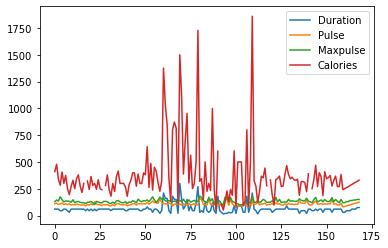

In [ ]:
data.plot()

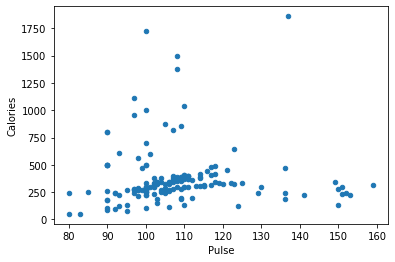

In [ ]:
data.plot(kind = 'scatter', x = 'Duration', y = 'Calories')

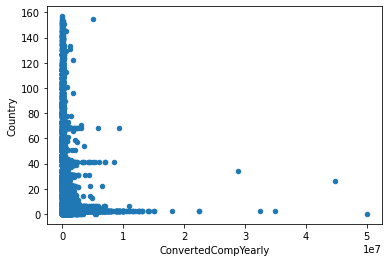

In [ ]:
new_df.plot(kind = 'scatter', x = 'ConvertedCompYearly', y = 'Country')

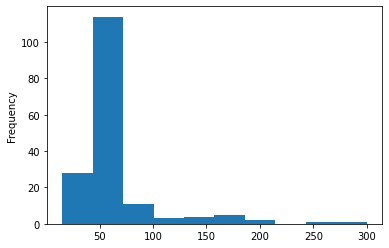

In [ ]:
data["Duration"].plot(kind = 'hist')

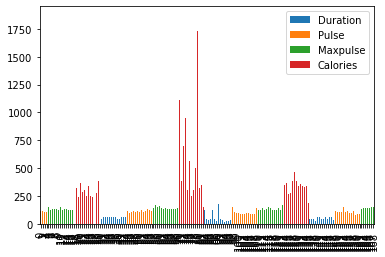

In [ ]:
data.plot.bar()

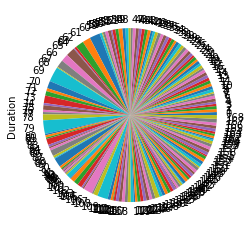

In [ ]:
data["Duration"].plot(kind = 'pie')

# Dates and Time Series Data

In [ ]:
! wget https://github.com/CoreyMSchafer/code_snippets/raw/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv

--2022-10-30 13:36:02--  https://github.com/CoreyMSchafer/code_snippets/raw/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv [following]
--2022-10-30 13:36:02--  https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1458608 (1.4M) [text/plain]
Saving to: ‘ETH_1h.csv’

ETH_1h.csv          100%[===================>]   1.39M  --.-KB/s    in 0.009s  

2022

In [ ]:
data = pd.read_csv("ETH_1h.csv")

In [ ]:
data

Date  Symbol    Open    High     Low   Close      Volume
0      2020-03-13 08-PM  ETHUSD  129.94  131.82  126.87  128.71  1940673.93
1      2020-03-13 07-PM  ETHUSD  119.51  132.02  117.10  129.94  7579741.09
2      2020-03-13 06-PM  ETHUSD  124.47  124.85  115.50  119.51  4898735.81
3      2020-03-13 05-PM  ETHUSD  124.08  127.42  121.63  124.47  2753450.92
4      2020-03-13 04-PM  ETHUSD  124.85  129.51  120.17  124.08  4461424.71
...                 ...     ...     ...     ...     ...     ...         ...
23669  2017-07-01 03-PM  ETHUSD  265.74  272.74  265.00  272.57  1500282.55
23670  2017-07-01 02-PM  ETHUSD  268.79  269.90  265.00  265.74  1702536.85
23671  2017-07-01 01-PM  ETHUSD  274.83  274.93  265.00  268.79  3010787.99
23672  2017-07-01 12-PM  ETHUSD  275.01  275.01  271.00  274.83   824362.87
23673  2017-07-01 11-AM  ETHUSD  279.98  279.99  272.10  275.01   679358.87

[23674 rows x 7 columns]

In [ ]:
type( data.loc[0,'Date'] ) 

str

In order to convert the string to a date type we need to specify the format of the string like so

2012-03-12  = %Y-%m-%d 

the symbols for creating the format can be found [HERE](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [ ]:
pd.to_datetime('2012-03-12')

Timestamp('2012-03-12 00:00:00')

In [ ]:
pd.to_datetime(data.loc[0,'Date'])

In [ ]:
format = '%Y-%m-%d %I-%p'
pd.to_datetime(data.loc[0,'Date'] ,format =format)

Timestamp('2020-03-13 20:00:00')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'] ,format =format)

In [ ]:
data.loc[0, 'Date'].day_name()

'Friday'

In [ ]:
data['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [ ]:
data['DayOfWeek'] = data['Date'].dt.day_name()

In [ ]:
data['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [ ]:
data['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [ ]:
data['Date'].max() - data['Date'].min()

Timedelta('986 days 09:00:00')

In [ ]:
filt = (data['Date'] >= "2020")
data.loc[filt]

Date  Symbol    Open    High     Low   Close      Volume  \
0    2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71  1940673.93   
1    2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94  7579741.09   
2    2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51  4898735.81   
3    2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47  2753450.92   
4    2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08  4461424.71   
...                  ...     ...     ...     ...     ...     ...         ...   
1744 2020-01-01 04:00:00  ETHUSD  129.57  130.00  129.50  129.56   702786.82   
1745 2020-01-01 03:00:00  ETHUSD  130.37  130.44  129.38  129.57   496704.23   
1746 2020-01-01 02:00:00  ETHUSD  130.14  130.50  129.91  130.37   396315.72   
1747 2020-01-01 01:00:00  ETHUSD  128.34  130.14  128.32  130.14   635419.40   
1748 2020-01-01 00:00:00  ETHUSD  128.54  128.54  128.12  128.34   245119.91   

      DayOfWeek  
0        Friday  
1        Friday  
2        Friday  
3        Friday  
4        Friday  
...         ...  
1744  Wednesday  
1745  Wednesday  
1746  Wednesday  
1747  Wednesday  
1748  Wednesday  

[1749 rows x 8 columns]

In [ ]:
filt = (data['Date'] >= pd.to_datetime('2019-01-01'))
data.loc[filt]

Date  Symbol    Open    High     Low   Close      Volume  \
0     2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71  1940673.93   
1     2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94  7579741.09   
2     2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51  4898735.81   
3     2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47  2753450.92   
4     2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08  4461424.71   
...                   ...     ...     ...     ...     ...     ...         ...   
10504 2019-01-01 04:00:00  ETHUSD  130.75  133.96  130.74  131.96  2791135.37   
10505 2019-01-01 03:00:00  ETHUSD  130.06  130.79  130.06  130.75   503732.63   
10506 2019-01-01 02:00:00  ETHUSD  130.79  130.88  129.55  130.06   838183.43   
10507 2019-01-01 01:00:00  ETHUSD  131.62  131.62  130.77  130.79   434917.99   
10508 2019-01-01 00:00:00  ETHUSD  130.53  131.91  130.48  131.62  1067136.21   

      DayOfWeek  
0        Friday  
1        Friday  
2        Friday  
3        Friday  
4        Friday  
...         ...  
10504   Tuesday  
10505   Tuesday  
10506   Tuesday  
10507   Tuesday  
10508   Tuesday  

[10509 rows x 8 columns]

In [ ]:
filt = (data['Date'] >= pd.to_datetime('2019-01-01')) & (data['Date'] < pd.to_datetime('2020-01-01'))
data.loc[filt]

Date  Symbol    Open    High     Low   Close      Volume  \
1749  2019-12-31 23:00:00  ETHUSD  128.33  128.69  128.14  128.54   440678.91   
1750  2019-12-31 22:00:00  ETHUSD  128.38  128.69  127.95  128.33   554646.02   
1751  2019-12-31 21:00:00  ETHUSD  127.86  128.43  127.72  128.38   350155.69   
1752  2019-12-31 20:00:00  ETHUSD  127.84  128.34  127.71  127.86   428183.38   
1753  2019-12-31 19:00:00  ETHUSD  128.69  128.69  127.60  127.84  1169847.84   
...                   ...     ...     ...     ...     ...     ...         ...   
10504 2019-01-01 04:00:00  ETHUSD  130.75  133.96  130.74  131.96  2791135.37   
10505 2019-01-01 03:00:00  ETHUSD  130.06  130.79  130.06  130.75   503732.63   
10506 2019-01-01 02:00:00  ETHUSD  130.79  130.88  129.55  130.06   838183.43   
10507 2019-01-01 01:00:00  ETHUSD  131.62  131.62  130.77  130.79   434917.99   
10508 2019-01-01 00:00:00  ETHUSD  130.53  131.91  130.48  131.62  1067136.21   

      DayOfWeek  
1749    Tuesday  
1750    Tuesday  
1751    Tuesday  
1752    Tuesday  
1753    Tuesday  
...         ...  
10504   Tuesday  
10505   Tuesday  
10506   Tuesday  
10507   Tuesday  
10508   Tuesday  

[8760 rows x 8 columns]

In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
data

Symbol    Open    High     Low   Close      Volume  \
Date                                                                      
2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71  1940673.93   
2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94  7579741.09   
2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51  4898735.81   
2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47  2753450.92   
2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08  4461424.71   
...                     ...     ...     ...     ...     ...         ...   
2017-07-01 15:00:00  ETHUSD  265.74  272.74  265.00  272.57  1500282.55   
2017-07-01 14:00:00  ETHUSD  268.79  269.90  265.00  265.74  1702536.85   
2017-07-01 13:00:00  ETHUSD  274.83  274.93  265.00  268.79  3010787.99   
2017-07-01 12:00:00  ETHUSD  275.01  275.01  271.00  274.83   824362.87   
2017-07-01 11:00:00  ETHUSD  279.98  279.99  272.10  275.01   679358.87   

                    DayOfWeek  
Date                           
2020-03-13 20:00:00    Friday  
2020-03-13 19:00:00    Friday  
2020-03-13 18:00:00    Friday  
2020-03-13 17:00:00    Friday  
2020-03-13 16:00:00    Friday  
...                       ...  
2017-07-01 15:00:00  Saturday  
2017-07-01 14:00:00  Saturday  
2017-07-01 13:00:00  Saturday  
2017-07-01 12:00:00  Saturday  
2017-07-01 11:00:00  Saturday  

[23674 rows x 7 columns]

In [ ]:
data['2020-01':'2020-02']

Symbol    Open    High     Low   Close      Volume  \
Date                                                                      
2020-02-29 23:00:00  ETHUSD  223.35  223.58  216.83  217.31  1927939.88   
2020-02-29 22:00:00  ETHUSD  223.48  223.59  222.14  223.35   535998.57   
2020-02-29 21:00:00  ETHUSD  224.63  225.14  222.74  223.48   561158.03   
2020-02-29 20:00:00  ETHUSD  225.31  225.33  223.50  224.63   511648.65   
2020-02-29 19:00:00  ETHUSD  225.09  225.85  223.87  225.31  1250856.20   
...                     ...     ...     ...     ...     ...         ...   
2020-01-01 04:00:00  ETHUSD  129.57  130.00  129.50  129.56   702786.82   
2020-01-01 03:00:00  ETHUSD  130.37  130.44  129.38  129.57   496704.23   
2020-01-01 02:00:00  ETHUSD  130.14  130.50  129.91  130.37   396315.72   
2020-01-01 01:00:00  ETHUSD  128.34  130.14  128.32  130.14   635419.40   
2020-01-01 00:00:00  ETHUSD  128.54  128.54  128.12  128.34   245119.91   

                     DayOfWeek  
Date                            
2020-02-29 23:00:00   Saturday  
2020-02-29 22:00:00   Saturday  
2020-02-29 21:00:00   Saturday  
2020-02-29 20:00:00   Saturday  
2020-02-29 19:00:00   Saturday  
...                        ...  
2020-01-01 04:00:00  Wednesday  
2020-01-01 03:00:00  Wednesday  
2020-01-01 02:00:00  Wednesday  
2020-01-01 01:00:00  Wednesday  
2020-01-01 00:00:00  Wednesday  

[1440 rows x 7 columns]

In [ ]:
data['2020']['High'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


290.0

# Feature Correlation
What is correlation? Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect.

**What do correlation numbers mean?**

We describe correlations with a unit-free measure called the correlation coefficient which ranges from -1 to +1 and is denoted by r. Statistical significance is indicated with a p-value. Therefore, correlations are typically written with two key numbers: r = and p = .

1. The closer r is to zero, the weaker the linear relationship.

2. Positive r values indicate a positive correlation, where the values of both variables tend to increase together.

3. Negative r values indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable decrease.
4. The p-value gives us evidence that we can meaningfully conclude that the population correlation coefficient is likely different from zero, based on what we observe from the sample.
5. "Unit-free measure" means that correlations exist on their own scale: in our example, the number given for r is not on the same scale as either elevation or temperature. This is different from other summary statistics. For instance, the mean of the elevation measurements is on the same scale as its variable.


Let’s get a closer look at what this means and how correlation can be useful. There are three types of correlations:

**Positive Correlation:** means that if feature A increases then feature B also increases or if feature A decreases then feature B also decreases. Both features move in tandem and they have a linear relationship.

**Negative Correlation:** means that if feature A increases then feature B decreases and vice versa.

**No Correlation:** No relationship between those two attributes.

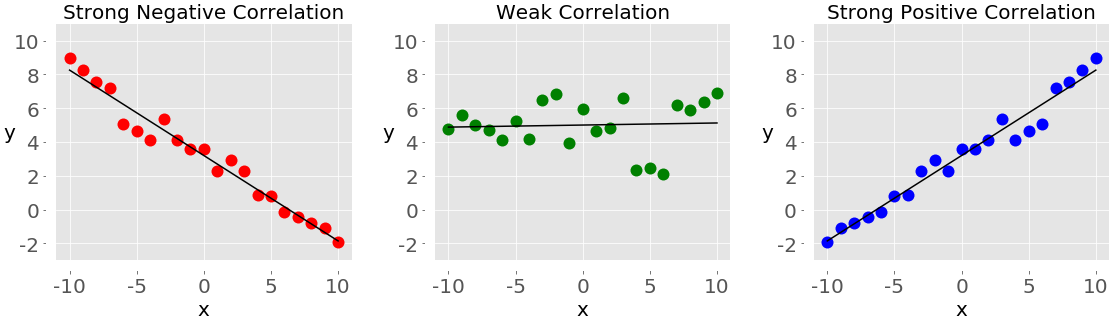

In [ ]:
dataset = pd.read_csv('/content/sample_data/california_housing_test.csv')
dataset

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value  
0         1537.0       606.0         6.6085            344700.0  
1          809.0       277.0         3.5990            176500.0  
2         1484.0       495.0         5.7934            270500.0  
3           49.0        11.0         6.1359            330000.0  
4          850.0       237.0         2.9375             81700.0  
...          ...         ...            ...                 ...  
2995      1258.0       607.0         1.1790            225000.0  
2996      3496.0      1036.0         3.3906            237200.0  
2997       693.0       220.0         2.2895             62000.0  
2998        46.0        14.0         3.2708            162500.0  
2999       753.0       260.0         8.5608            500001.0  

[3000 rows x 9 columns]

In [ ]:
dataset.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925017           -0.064203     0.049865   
latitude            -0.925017  1.000000           -0.025143    -0.039632   
housing_median_age  -0.064203 -0.025143            1.000000    -0.367850   
total_rooms          0.049865 -0.039632           -0.367850     1.000000   
total_bedrooms       0.070869 -0.068245           -0.323154     0.937749   
population           0.111572 -0.117318           -0.299888     0.838867   
households           0.051062 -0.068296           -0.305171     0.914116   
median_income       -0.018701 -0.072363           -0.144315     0.221249   
median_house_value  -0.050662 -0.138428            0.091409     0.160427   

                    total_bedrooms  population  households  median_income  \
longitude                 0.070869    0.111572    0.051062      -0.018701   
latitude                 -0.068245   -0.117318   -0.068296      -0.072363   
housing_median_age       -0.323154   -0.299888   -0.305171      -0.144315   
total_rooms               0.937749    0.838867    0.914116       0.221249   
total_bedrooms            1.000000    0.856387    0.970758       0.024025   
population                0.856387    1.000000    0.895530       0.032361   
households                0.970758    0.895530    1.000000       0.048625   
median_income             0.024025    0.032361    0.048625       1.000000   
median_house_value        0.082279   -0.001192    0.100176       0.672695   

                    median_house_value  
longitude                    -0.050662  
latitude                     -0.138428  
housing_median_age            0.091409  
total_rooms                   0.160427  
total_bedrooms                0.082279  
population                   -0.001192  
households                    0.100176  
median_income                 0.672695  
median_house_value            1.000000

#Save dataframe

In [ ]:
# to save the data as a csv file
sal.to_csv(r'my_data.csv', index=False)

# Kaggle